## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
!pip install pandas_datareader

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

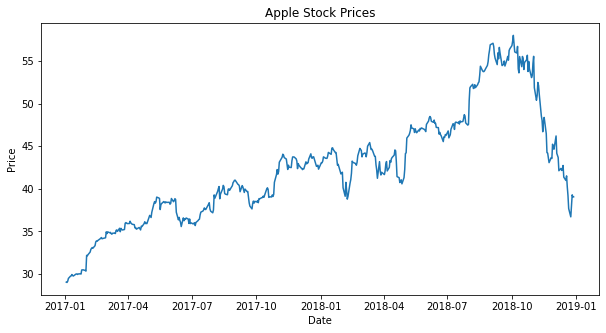

In [3]:

# Загрузка данных
start_date = '2017-01-01'
end_date = '2018-12-31'
df = pd.read_csv('AAPL.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.loc[start_date:end_date]





# Визуализация временного ряда цен акций Apple
plt.figure(figsize=(10, 5))
plt.plot(df['Close'])
plt.title('Apple Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

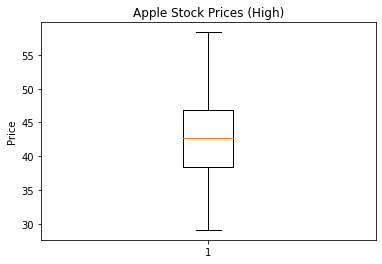

In [4]:
plt.boxplot(df['High'])
plt.title('Apple Stock Prices (High)')
plt.ylabel('Price')
plt.show()

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

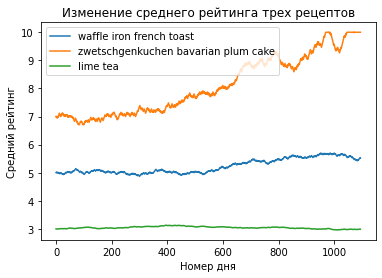

In [5]:
# загрузка данных из файла
data = np.load('average_ratings.npy')

# создание графика
plt.plot(data[0], label='waffle iron french toast')
plt.plot(data[1], label='zwetschgenkuchen bavarian plum cake')
plt.plot(data[2], label='lime tea')

# добавление подписей осей и заголовка графика
plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга трех рецептов')

# добавление легенды
plt.legend()

# отображение графика
plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


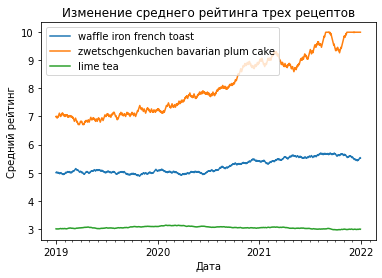

In [6]:
# загрузка данных
data = np.load('average_ratings.npy')

# создание диапазона дат
start_date = '2019-01-01'
end_date = '2021-12-30'
dates = pd.date_range(start=start_date, end=end_date, freq = '1D')

# создание графика с использованием диапазона дат
fig, ax = plt.subplots()
ax.plot(dates, data[0], label='waffle iron french toast')
ax.plot(dates, data[1], label='zwetschgenkuchen bavarian plum cake')
ax.plot(dates, data[2], label='lime tea')

# настройка осей и легенды
ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.legend()

plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

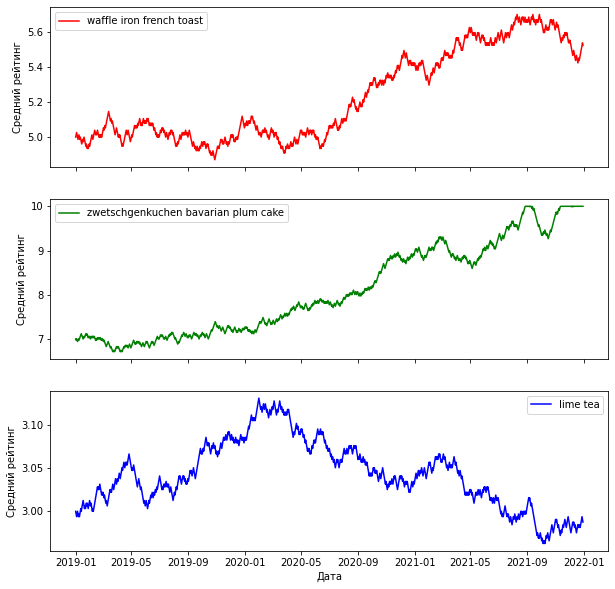

In [7]:
# диапазон дат
dates = pd.date_range(start='2019-01-01', end='2021-12-30', freq='D')

# создание графиков
fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(10, 10))

# график 1
axs[0].plot(dates, data[0], color='red', label='waffle iron french toast')
axs[0].legend()
axs[0].set_ylabel('Средний рейтинг')


# график 2
axs[1].plot(dates, data[1], color='green', label='zwetschgenkuchen bavarian plum cake')
axs[1].legend()
axs[1].set_ylabel('Средний рейтинг')


# график 3
axs[2].plot(dates, data[2], color='blue', label='lime tea')
axs[2].legend()
axs[2].set_ylabel('Средний рейтинг')
axs[2].set_xlabel('Дата')


plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


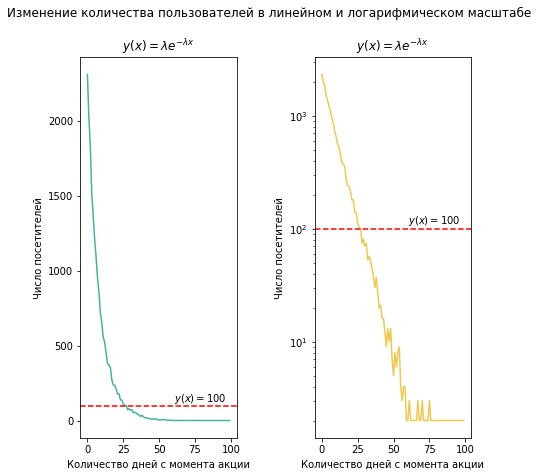

In [8]:
visitors = np.load('visitors.npy')


fig, axs = plt.subplots(1,2, figsize = (7,7))

fig.subplots_adjust(wspace=0.5)

# график 1
axs[0].plot(visitors, color = '#45B29D')
axs[0].set_title(r'$y(x) = \lambda e^{-\lambda x}$')
axs[0].set_ylabel('Число посетителей')
axs[0].set_xlabel('Количество дней с момента акции')
axs[0].axhline (y=100, color='red', linestyle='--') 
axs[0].text(60, 130, '$y(x) = 100$')


# график 2
axs[1].semilogy(visitors, color = '#EFC94C')
axs[1].set_title('$y(x) = \lambda e^{-\lambda x}$')
axs[1].set_ylabel('Число посетителей')
axs[1].set_xlabel('Количество дней с момента акции')
axs[1].axhline (y=100, color='red', linestyle='--') 
axs[1].text(60, 110, '$y(x) = 100$')



fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')
plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [9]:
reviews = pd.read_csv('reviews_sample.csv')
recipes = pd.read_csv('recipes_sample.csv')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

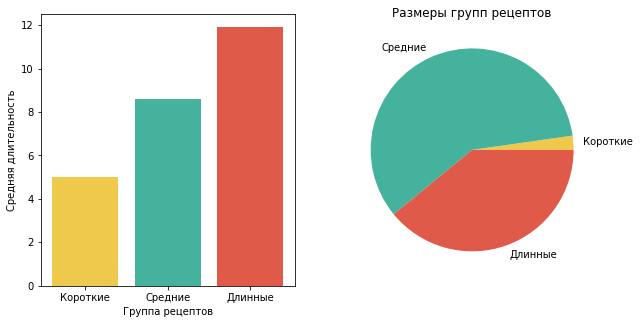

In [10]:
# Сгруппируем рецепты по длительности
short_recipes = recipes[recipes['minutes'] < 5]
medium_recipes = recipes[(recipes['minutes'] >= 5) & (recipes['minutes'] < 50)]
long_recipes = recipes[recipes['minutes'] >= 50]

# Посчитаем среднее количество шагов для каждой группы рецептов
short_steps_mean = short_recipes['n_steps'].mean()
medium_steps_mean = medium_recipes['n_steps'].mean()
long_steps_mean = long_recipes['n_steps'].mean()

# Определим размер каждой группы
short_size = short_recipes.shape[0] # длина
medium_size = medium_recipes.shape[0]
long_size = long_recipes.shape[0]

# Создадим subplot с двумя осями
fig, axs = plt.subplots(1,2, figsize=(10, 5))

colors = ['#EFC94C', '#45B29D', '#DF5A49']

# Построим столбчатую диаграмму среднего количества шагов в рецептах
axs[0].bar(['Короткие', 'Средние', 'Длинные'], [short_steps_mean, medium_steps_mean, long_steps_mean], color = colors)
axs[0].set_xlabel('Группа рецептов')
axs[0].set_ylabel('Средняя длительность')

# Построим круговую диаграмму размера каждой группы рецептов
sizes = [short_size, medium_size, long_size]
axs[1].pie(sizes, labels=['Короткие', 'Средние', 'Длинные'], colors = colors)
axs[1].set_title('Размеры групп рецептов')

# Показываем графики
plt.show()

In [11]:
short_recipes.shape[0]

675

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

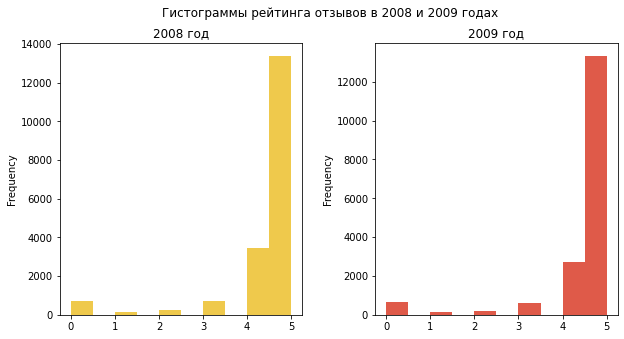

In [14]:
# Преобразование столбца 'date' в формат datetime
reviews['date'] = pd.to_datetime(reviews['date'])

# Оставляем только отзывы, которые были оставлены в 2008 и 2009 годах
reviews_08 = reviews.loc[reviews['date'].dt.year == 2008]
reviews_09 = reviews.loc[reviews['date'].dt.year == 2009]



# Построение гистограмм

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.3)
reviews_08['rating'].plot.hist(ax=ax1, color = '#EFC94C')
reviews_09['rating'].plot.hist(ax=ax2, color = '#DF5A49')
ax1.set_title('2008 год')
ax2.set_title('2009 год')
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')
plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

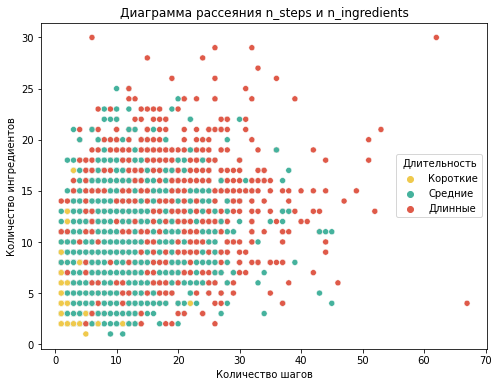

In [23]:
# Создание столбца с категориальным признаком длительности рецепта
bins = [0, 5, 50, np.inf]
labels = ['Короткие', 'Средние', 'Длинные']
recipes['Длительность'] = pd.cut(recipes['minutes'], bins=bins, labels=labels)

# Построение диаграммы рассеяния
plt.figure(figsize=(8, 6))
sns.scatterplot(data=recipes, 
                x="n_steps", 
                y="n_ingredients", 
                hue='Длительность',
                palette=colors)

plt.xlabel('Количество шагов')
plt.ylabel('Количество ингредиентов')
plt.title('Диаграмма рассеяния n_steps и n_ingredients')
plt.show()

In [24]:
recipes['Длительность']

0        Длинные
1        Средние
2        Средние
3        Средние
4        Средние
          ...   
29995    Длинные
29996    Длинные
29997    Длинные
29998    Длинные
29999    Средние
Name: Длительность, Length: 30000, dtype: category
Categories (3, object): ['Короткие' < 'Средние' < 'Длинные']

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

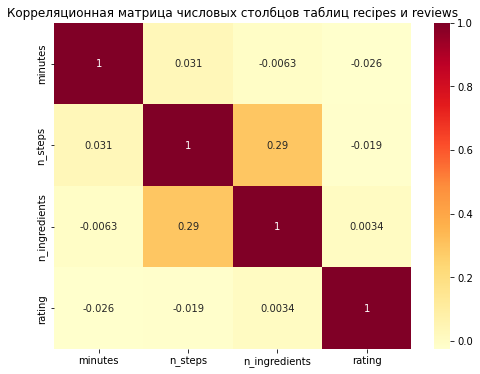

In [ ]:
# объединение таблиц
data = pd.merge(recipes, reviews, left_on='id', right_on='recipe_id')

# выбор столбцов для корреляционной матрицы
columns = ['minutes', 'n_steps', 'n_ingredients', 'rating']

# создание корреляционной матрицы
corr_matrix = data[columns].corr()

# визуализация корреляционной матрицы
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')
plt.show()